In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\girip\Downloads\DS1_C5_S1_EmployeeAttrition_Data_Practice.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [4]:
#task 1 Display the basic information about the dataset

def basic_info(df):
    print("Basic Information about the Dataset:")
    print(df.info())
    print("\nCount of missing values for each column:")
    print(df.isnull().sum())

In [5]:
basic_info(df)

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             

In [44]:
#task 2 Define a function that identifies the data type of columns as categorical or numerical

def cat_num(df):
    cat=[]
    num=[]
    for col in df.columns:
        if df[col].dtype == 'object':
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat,num=cat_num(df)
from tabulate import tabulate
print(tabulate({'category':cat,'Numeric':num},headers=['category','Numeric']))

category        Numeric
--------------  ------------------------
Attrition       Age
BusinessTravel  DistanceFromHome
Department      EmployeeNumber
EducationField  EnvironmentSatisfaction
Gender          HourlyRate
JobRole         JobInvolvement
MaritalStatus   JobSatisfaction
Over18          MonthlyIncome
OverTime        NumCompaniesWorked
                PerformanceRating
                RelationshipSatisfaction
                TotalWorkingYears
                TrainingTimesLastYear
                WorkLifeBalance
                YearsAtCompany
                YearsInCurrentRole
                YearsSinceLastPromotion
                YearsWithCurrManager


In [45]:
#task 3 number of category ,mode and missing values

def descriptive_analysis_categorical(col):
    print(f"Descriptive Analysis of Column: {col}")
    print(f"Number of categories (unique values): {df[col].nunique()}")
    print(f"Mode of the column: {df[col].mode()[0]}")
    print(f"Missing values: {df[col].isnull().sum()}")

    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [46]:
descriptive_analysis_categorical('Age')

Descriptive Analysis of Column: Age
Number of categories (unique values): 43
Mode of the column: 34.0
Missing values: 0


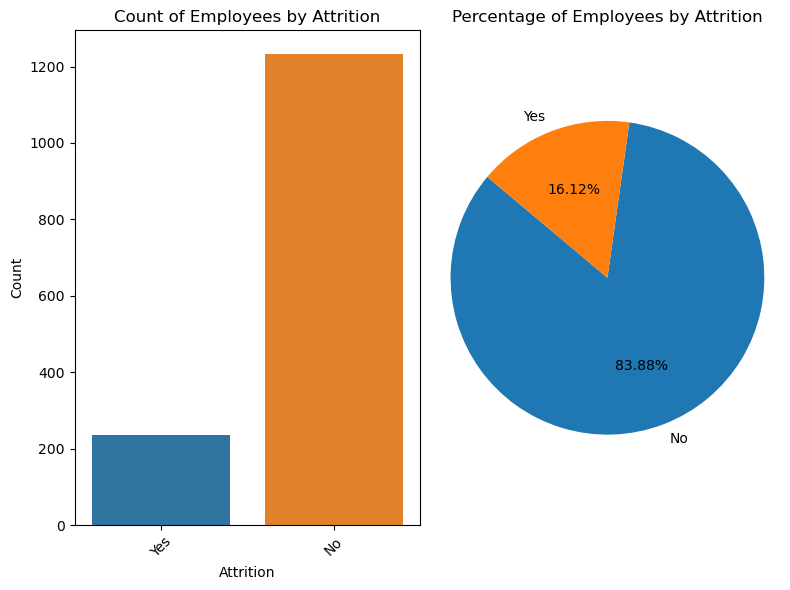

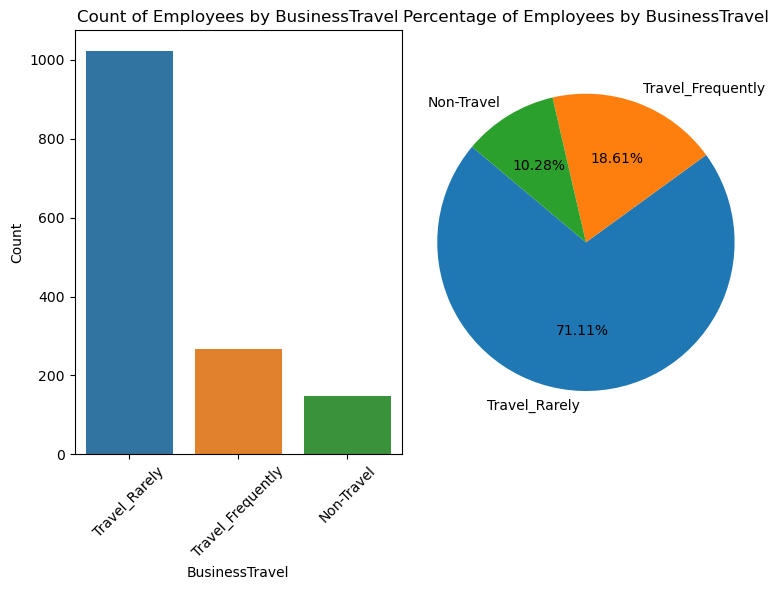

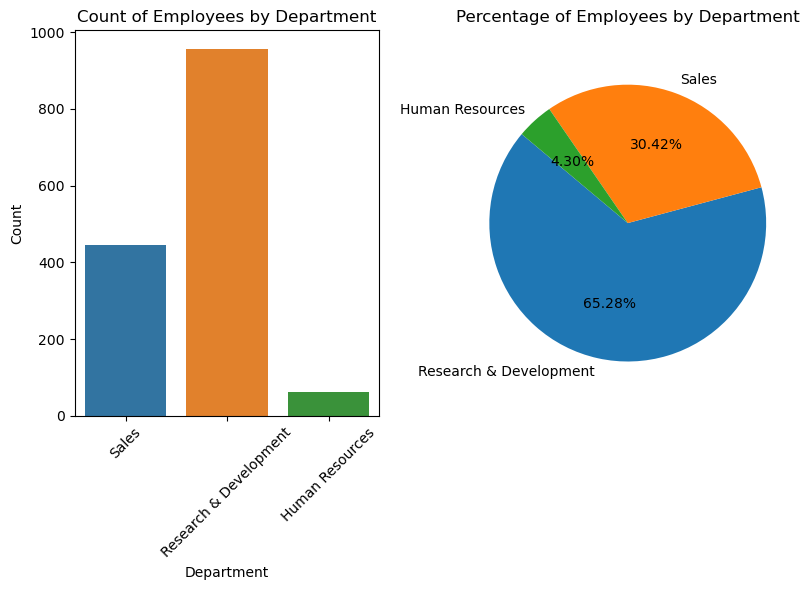

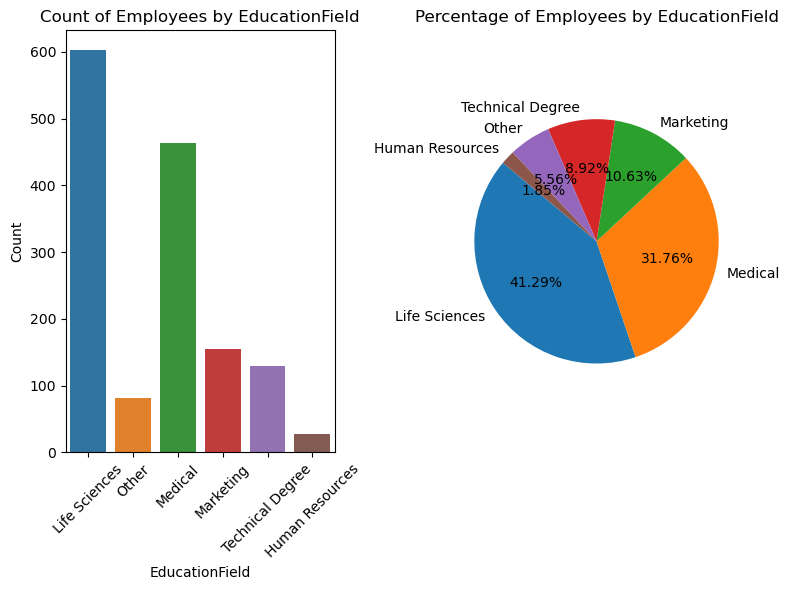

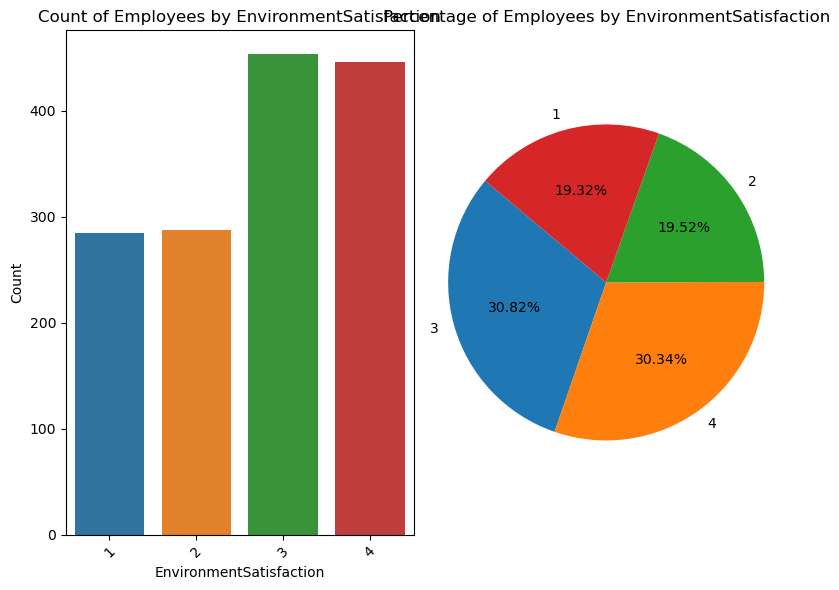

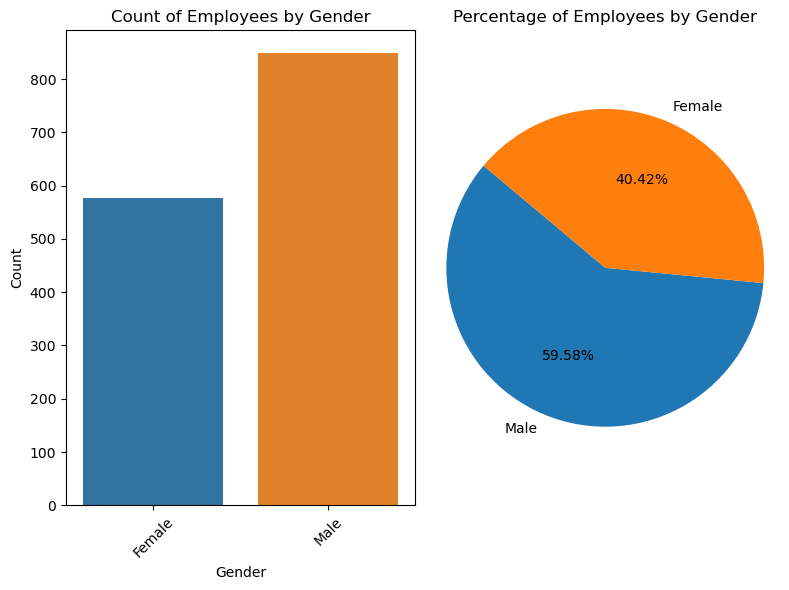

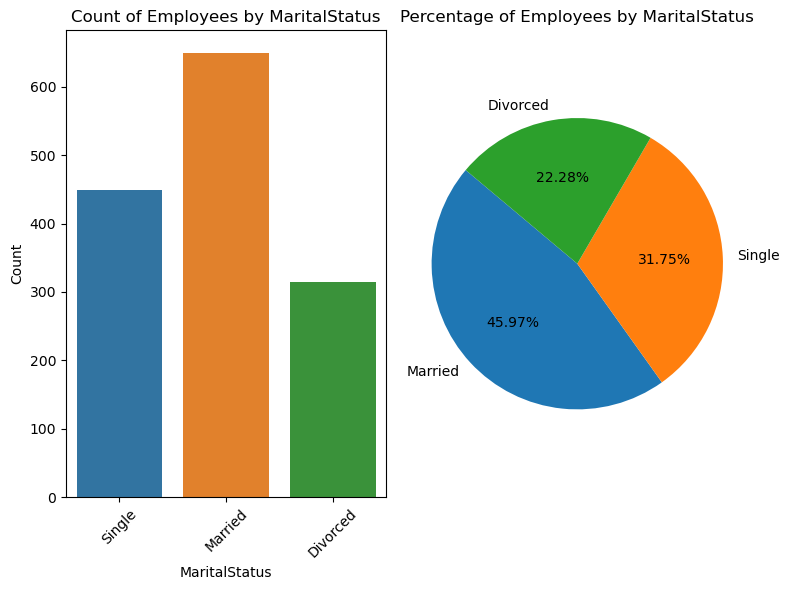

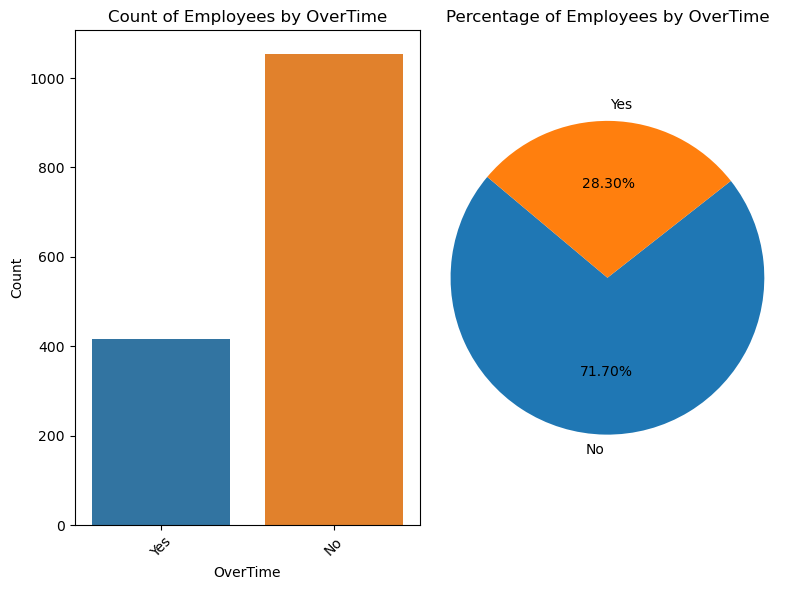

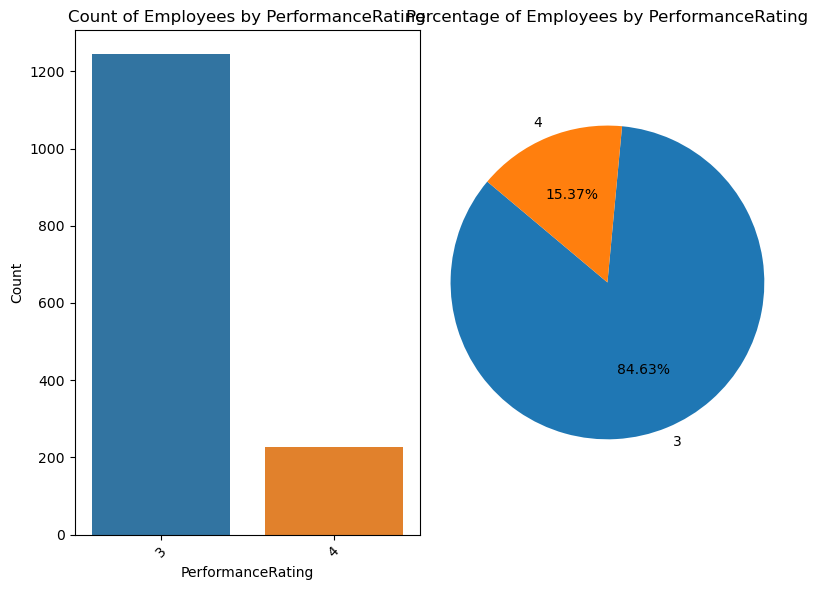

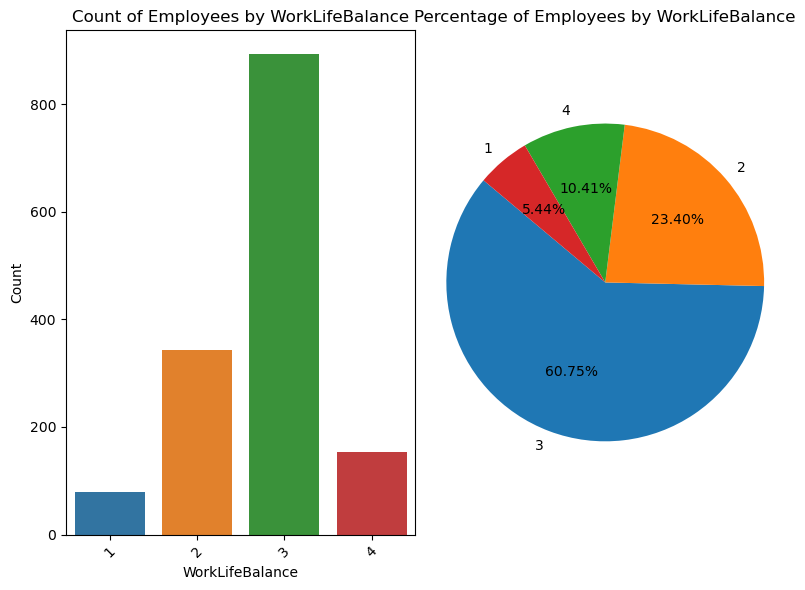

In [47]:
# Task 4  plot categorical analysis

def plot_categorical_analysis(df,col):
    plt.figure(figsize=(8,6))
    plt.subplot(1, 2, 1)
    sb.countplot(data=df,x=col)
    plt.title(f'Count of Employees by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    counts = df[col].value_counts()
    labels = counts.index
    plt.pie(counts, labels=labels, autopct='%.2f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Percentage of Employees by {col}')
    plt.tight_layout()
    plt.show()

# 'Attrition' column analysis
plot_categorical_analysis(df, 'Attrition')

# 'Business_Travel' column analysis
plot_categorical_analysis(df, 'BusinessTravel')

# 'Department' column analysis
plot_categorical_analysis(df, 'Department')

# 'EducationField' column analysis
plot_categorical_analysis(df, 'EducationField')

# 'EnvironmentSatisfaction' column analysis
plot_categorical_analysis(df, 'EnvironmentSatisfaction')

# 'Gender' column analysis
plot_categorical_analysis(df, 'Gender')

# 'MaritalStatus' column analysis
plot_categorical_analysis(df, 'MaritalStatus')

# 'OverTime' column analysis
plot_categorical_analysis(df, 'OverTime')

# 'PerformanceRating' column analysis
plot_categorical_analysis(df, 'PerformanceRating')

# 'WorkLifeBalance' column analysis
plot_categorical_analysis(df, 'WorkLifeBalance')


In [34]:
# Task 5 descriptive analysis for numerical column

def descriptive_analysis_numerical(col):
    print(f"Descriptive Analysis of Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"Skewness: {df[col].skew()}")
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [37]:
descriptive_analysis_numerical('EmployeeNumber')

Descriptive Analysis of Column: EmployeeNumber
Mean: 1024.865306122449
Median: 1020.5
Standard Deviation: 602.024334847475
Missing values: 0
Skewness: 0.016574019580105036


Descriptive Analysis of Column: Age
Mean: 36.88231292517007
Median: 35.0
Standard Deviation: 9.094640442374576
Missing values: 0
Skewness: 0.42662070733625096


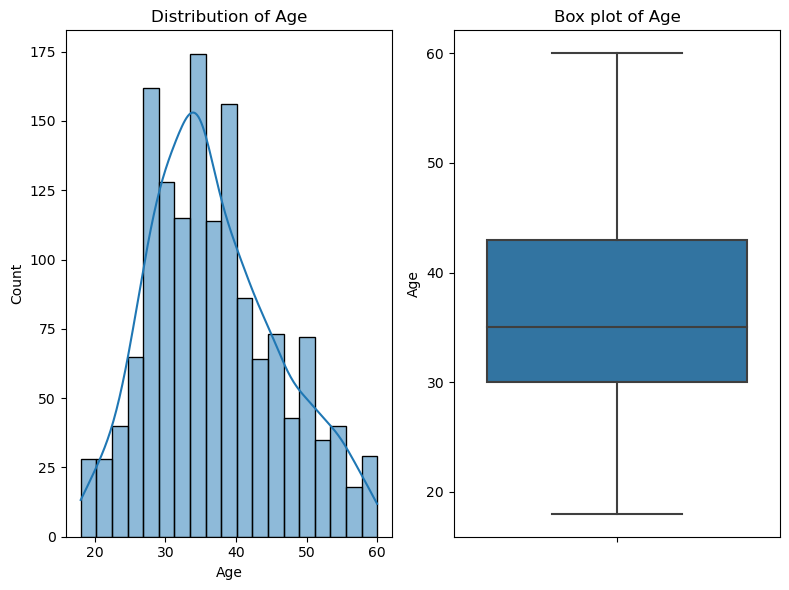

Descriptive Analysis of Column: HourlyRate
Mean: 65.89115646258503
Median: 66.0
Standard Deviation: 20.329427593996158
Missing values: 0
Skewness: -0.03231095290044942


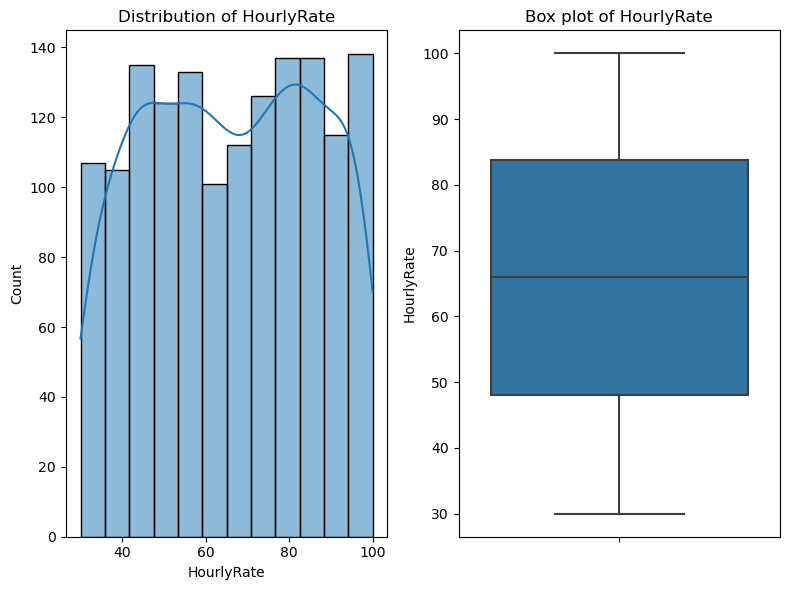

Descriptive Analysis of Column: MonthlyIncome
Mean: 6502.931292517007
Median: 4919.0
Standard Deviation: 4707.956783097995
Missing values: 0
Skewness: 1.3698166808390662


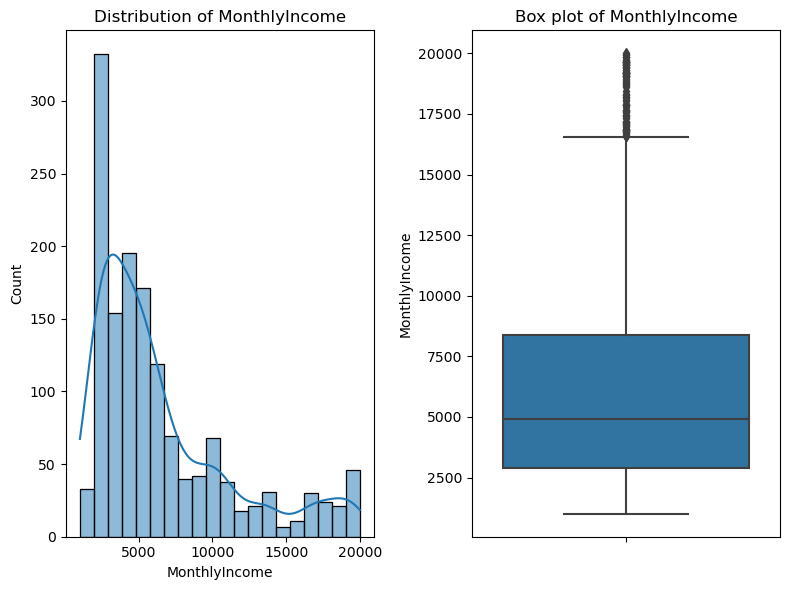

In [48]:
# Task 6 descriptive analysis numerical for age,hourlyrate and monthly income

def plot_numerical_analysis(col):
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    sb.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sb.boxplot(data=df,y=col)
    plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

# 'Age' column analysis
descriptive_analysis_numerical('Age')
plot_numerical_analysis('Age')

# 'HourlyRate' column analysis
descriptive_analysis_numerical('HourlyRate')
plot_numerical_analysis('HourlyRate')

# 'MonthlyIncome' column analysis
descriptive_analysis_numerical('MonthlyIncome')
plot_numerical_analysis('MonthlyIncome')